# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
import seaborn as sns
sns.set_style('darkgrid')

In [26]:
df = pd.read_csv('exch_rates.csv')
df['Frequency'] = pd.to_datetime(df['Frequency'])
df.set_index('Frequency', inplace=True)

Plot the three exchange rates in one plot

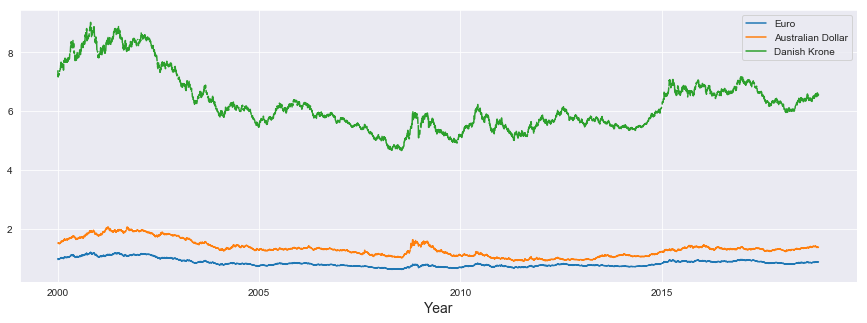

In [27]:
df.plot(figsize=(15,5))
plt.xlabel('Year', fontsize=14);

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [29]:
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

It would appear that the three currencies are very closely correlated. The Euro and Danish Krone are so close to one another that it seems likely that one currency is pegged to the other (the Krone is, in fact, pegged to the Euro). Though the Australian Dollar is pegged to the US Dollar, these currencies appear to fluctuate nearly in lock-step as well.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [30]:
# differenced correlation between currencies
df_diff = df.diff(periods=1)
df_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


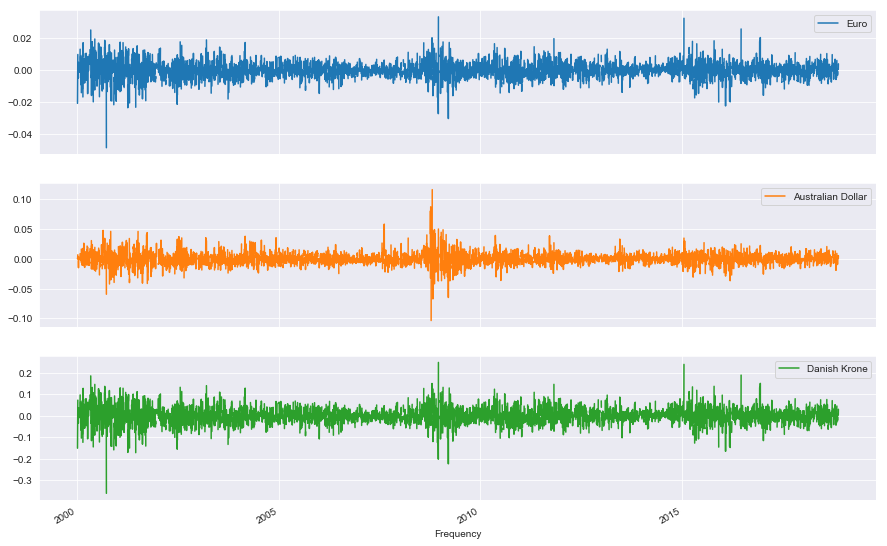

In [41]:
df_diff.plot(figsize = (15,10), subplots=True, legend=True);

### Explain what's going on

As expected, the Euro and Krone are pegged to one another (99.9667% correlation). After differencing, though, it appears the Aussie Dollar is less correlated to the other two than previously estimated.

### Autocorrelation

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


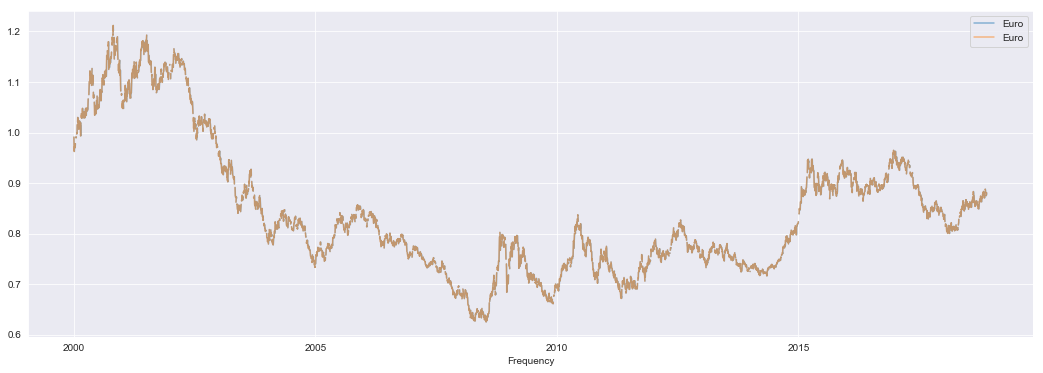

In [45]:
euro = df[['Euro']]
euro_shift_1 = euro.shift(periods=1)
euro_shift_1.head()

eurolag_1= pd.concat([euro_shift_1, euro], axis=1)
display(eurolag_1.corr())

eurolag_1.plot(figsize=(18,6), alpha=.5);

Repeat this, but for a "lag 50 autocorrelation"

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


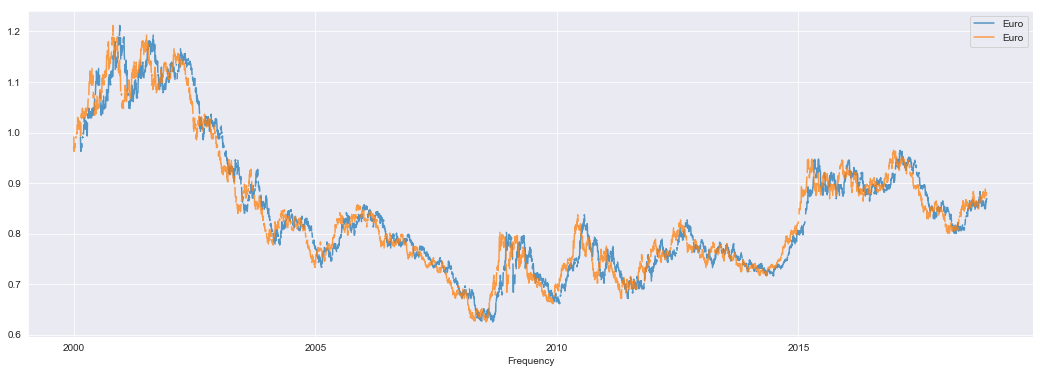

In [55]:
euro = df[['Euro']]
euro_shift_50 = euro.shift(periods=50)
euro_shift_50.head()

eurolag_50 = pd.concat([euro_shift_50, euro], axis=1)
display(eurolag_50.corr())

eurolag_50.plot(figsize=(18,6), alpha=.75);

### What's your conclusion here?

It seem that currency is more correlated to the previous day's value than it is to the value of a week prior (but only slightly so).

Knowing this, let's plot the ACF now.

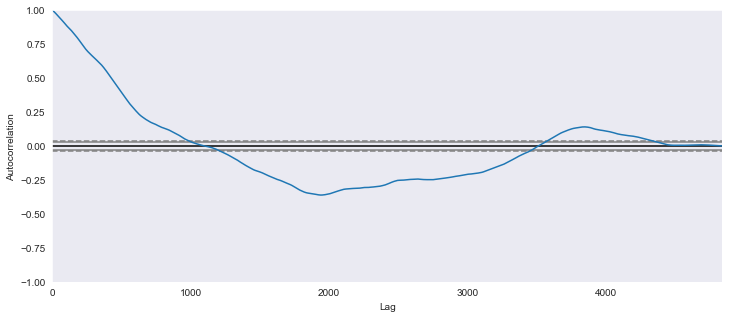

In [56]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

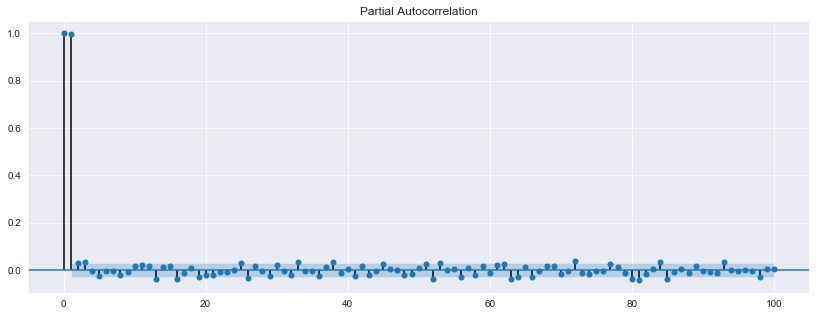

In [57]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(euro.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [59]:
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


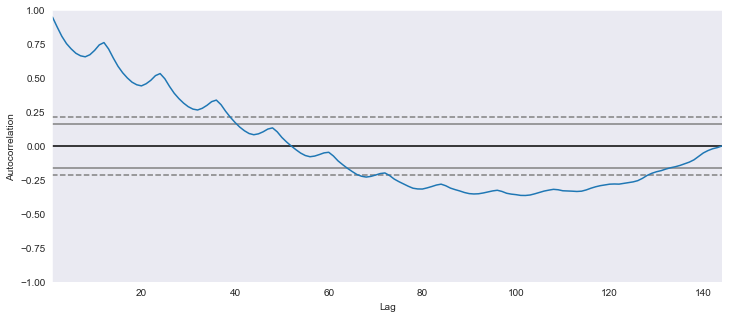

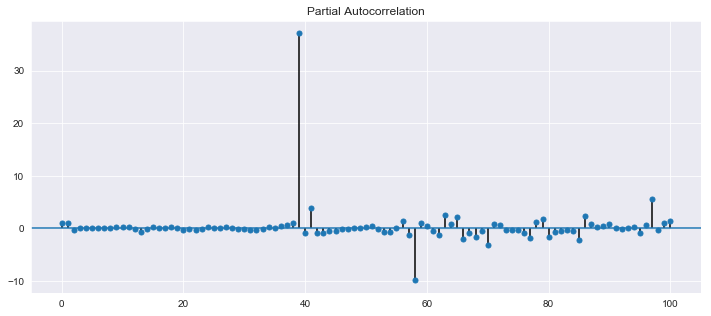

In [61]:
#ACF & PACF for original data
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air.dropna());
rcParams['figure.figsize'] = 12, 5
plot_pacf(air.dropna(), lags = 100);

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


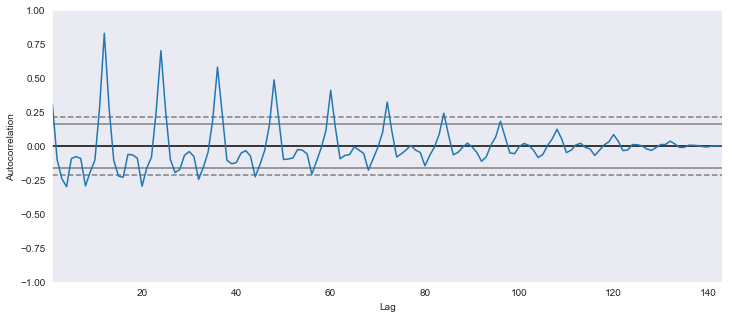

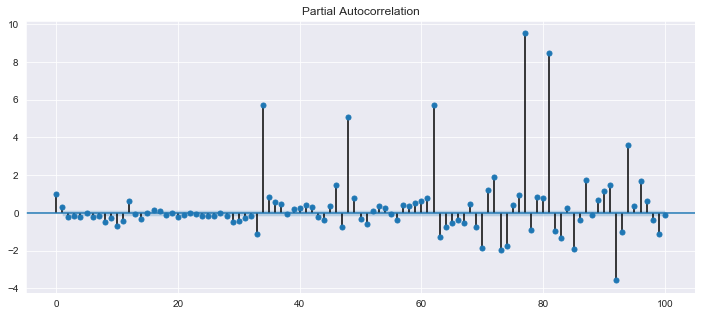

In [67]:
#ACF & PACF for differenced data
air_diff = air.diff(periods=1)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air_diff.dropna());
rcParams['figure.figsize'] = 12, 5
plot_pacf(air_diff.dropna(), lags = 100);

### Your conclusion here

Air travel appears to be fairly cyclical (with 12 months being the norm cycle size).

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [69]:
nyse = pd.read_csv('NYSE_monthly.csv')
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


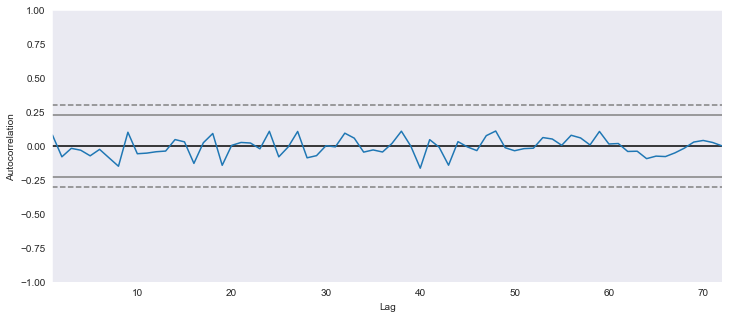

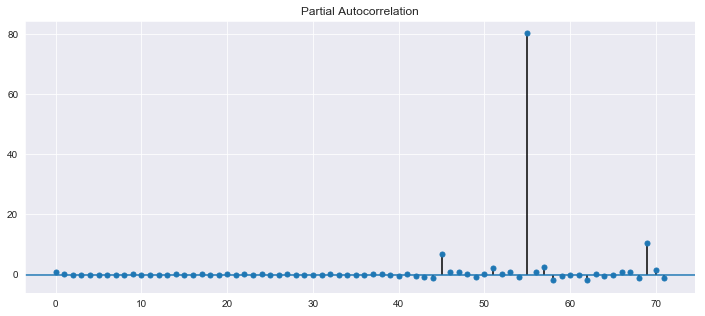

In [71]:
#ACF & PACF for original data
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nyse.dropna());
rcParams['figure.figsize'] = 12, 5
plot_pacf(nyse.dropna(), lags = 100);

## Your conclusion here

No apparent seasonality shown from comparing lags.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!